In [1]:
# Import necessary libraries

import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as ex
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Read data from CSV files
modi_data = pd.read_csv('modi_reviews.csv')
rahul_data = pd.read_csv('rahul_reviews.csv')

In [3]:
# Explore the Modi data
modi_data.head()
modi_data.shape

(25688, 3)

In [4]:
# Explore the Rahul data
rahul_data.head()
rahul_data.shape

(14261, 3)

In [5]:
modi_data['Tweet'][3]

'PM Modi creates a new record of being the only PM of a democratic country. \nCongratulations our pm welcome to the Heart of India again 🙏🙏🙏🙏🙏🙏🙏 .#Elections2019 #PMModi #DeshKaGauravModi #2020Election #BJP #India'

In [6]:
modi_data['Tweet'][10:20]

10    #BJP was renamed as Safroon Party then again i...
11    All Pakistanis had serious doubts on concept o...
12    @ajaymaken @RahulGandhi And as a final touch, ...
13    I think before casting the vote for  last phas...
14    Trying to forge opposition will be a futile ex...
15    #LokSabhaElections2019 Anyone not having mass ...
16    #ElectionCommission #LokSabhaElections2019 PM'...
17    @INCIndia should release a video of @RahulGand...
18    @KajalChauhan_ @dashingassu Our PM ( Modi ji) ...
19    Howmany Seats will BJP win ?\n\n#LokSabhaElect...
Name: Tweet, dtype: object

# Text Cleaning

In [7]:
# Define a function for text preprocessing
def preprocess_modi_text_data(data, text_column_name):
    # Lowercasing
    data[text_column_name] = data[text_column_name].str.lower()

    # Check and handle missing values
    print(f"Data type of '{text_column_name}' column before handling missing values: {data[text_column_name].dtype}")
    print(f"Number of missing values in '{text_column_name}' column before handling missing values: {data[text_column_name].isnull().sum()}")
    data = data.dropna(subset=[text_column_name])

    # Convert the column to strings
    data.loc[:, text_column_name] = data[text_column_name].astype(str)

    # Remove special characters, emojis, and emoticons
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'[^a-zA-Z\s😀-🙁]', '', x))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

    # Stemming
    stemmer = PorterStemmer()
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

    # Remove numbers
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'\d+', '', x))

    return data

# Apply text preprocessing to Modi data
modi_data = preprocess_modi_text_data(modi_data, 'Tweet')
modi_data = modi_data.drop('Unnamed: 0', axis=1)

# Explore the cleaned Modi data
modi_data.head()

Data type of 'Tweet' column before handling missing values: object
Number of missing values in 'Tweet' column before handling missing values: 5


C:\Users\navee\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


User                                              Tweet
0  advosushildixit  anjanaomkashyap see futur bjp spokesperson goo...
1           jiaeur  loksabhaelect rd may reveal even ecisveep coul...
2    PVenkatGandhi  loksabhaelect rd may reveal even ecisveep coul...
3      TheNirbhay1  pm modi creat new record pm democrat countri c...
4      ShakeChilli  abhijitmajumd appoint successor god forbid all...

In [8]:
rahul_data['Tweet'][3]

'@ajaymaken @RahulGandhi And as a final touch, #Modi ji proved this world that not Rahul but he is the real #Pappu thereby making @RahulGandhi the perfect fit for the future!\n\nThank you Modi ji 😅\n#BJP #Congress #RahulGandhi #Elections2019'

In [9]:
rahul_data['Tweet'][5:15]

5     @INCIndia should release a video of @RahulGand...
6     @thakkar_sameet @BDUTT @surjitbhalla 4/n smack...
7     Rahul Gandhi Spotted in Switzerland, 1 hour ag...
8     BJP will be nowhere in India after May 23. BJP...
9     #Punjab \nBhatinda- cong-  Sad neck to neck \n...
10    @IYCTelangana @IncBasavakalyan @narendramodi @...
11    @ani_digital @ANI @rssurjewala IF #ECI #SunilA...
12    My Predictions\n\nBJP+NDA = 300 to 310\nCongre...
13    Siddaramaiah, Mallikarjun Kharge, Dinesh Gundu...
14    @RahulGandhi RG Next PM of india #LokSabhaElec...
Name: Tweet, dtype: object

In [10]:
# Apply text preprocessing to Rahul data
def preprocess_rahul_text_data(data, text_column_name):
    # Lowercasing
    data[text_column_name] = data[text_column_name].str.lower()

    # Check and handle missing values
    print(f"Data type of '{text_column_name}' column before handling missing values: {data[text_column_name].dtype}")
    print(f"Number of missing values in '{text_column_name}' column before handling missing values: {data[text_column_name].isnull().sum()}")
    data = data.dropna(subset=[text_column_name])

    # Convert the column to strings
    data.loc[:, text_column_name] = data[text_column_name].astype(str)

    # Remove special characters, emojis, and emoticons
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'[^a-zA-Z\s😀-🙁]', '', x))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

    # Stemming
    stemmer = PorterStemmer()
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

    # Remove numbers
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'\d+', '', x))

    return data

rahul_data = preprocess_rahul_text_data(rahul_data, 'Tweet')
rahul_data = rahul_data.drop('Unnamed: 0', axis=1)
rahul_data.head()

Data type of 'Tweet' column before handling missing values: object
Number of missing values in 'Tweet' column before handling missing values: 0


User                                              Tweet
0     Sunnysweet16  wonder academ journalist ask inc india rahul g...
1    drnitinchaube  congrat chang australiavot scottmorrison sir w...
2        mrvivek07  peopel say govt ne year kya kiya uns pucho yea...
3    JosephPravinP  ajaymaken rahulgandhi final touch modi ji prov...
4  VandanaMegastar  loksabhaelect anyon mass back cant visionari p...

In [11]:
# Define a function to find the polarity of a review using TextBlob
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [12]:
# Apply polarity analysis to Modi data
modi_data['Polarity'] = modi_data['Tweet'].apply(find_polarity)

# Apply polarity analysis to Rahul data
rahul_data['Polarity'] = rahul_data['Tweet'].apply(find_polarity)

In [13]:
modi_data.head()

User                                              Tweet  \
0  advosushildixit  anjanaomkashyap see futur bjp spokesperson goo...   
1           jiaeur  loksabhaelect rd may reveal even ecisveep coul...   
2    PVenkatGandhi  loksabhaelect rd may reveal even ecisveep coul...   
3      TheNirbhay1  pm modi creat new record pm democrat countri c...   
4      ShakeChilli  abhijitmajumd appoint successor god forbid all...   

   Polarity  
0  0.193750  
1  0.800000  
2  0.800000  
3  0.578788  
4  0.274091

In [14]:
rahul_data.head()

User                                              Tweet  \
0     Sunnysweet16  wonder academ journalist ask inc india rahul g...   
1    drnitinchaube  congrat chang australiavot scottmorrison sir w...   
2        mrvivek07  peopel say govt ne year kya kiya uns pucho yea...   
3    JosephPravinP  ajaymaken rahulgandhi final touch modi ji prov...   
4  VandanaMegastar  loksabhaelect anyon mass back cant visionari p...   

   Polarity  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.480000  
4 -0.166667

In [15]:
# Assign sentiment labels based on polarity
modi_data['Label'] = np.where(modi_data['Polarity'] > 0, 'positive', 'negative')
modi_data['Label'][modi_data['Polarity'] == 0] = 'neutral'

rahul_data['Label'] = np.where(rahul_data['Polarity'] > 0, 'positive', 'negative')
rahul_data['Label'][rahul_data['Polarity'] == 0] = 'neutral'

C:\Users\navee\AppData\Local\Temp/ipykernel_37508/3260902751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_data['Label'][modi_data['Polarity'] == 0] = 'neutral'
C:\Users\navee\AppData\Local\Temp/ipykernel_37508/3260902751.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_data['Label'][rahul_data['Polarity'] == 0] = 'neutral'


In [16]:
modi_data.sample(20)

User                                              Tweet  \
5012     skshukla01INC  narendramodi terror return black kashmir due m...   
4116       ravi4nation  narendramodi bangal mood turn rule bcz come so...   
3673     Nivedita_Shan  said modi govern give employ look vivekoberoi ...   
25333      bubbysharma  karanjohar narendramodi bestest amp coolest se...   
18263          smaxy4u  wb nd phase repeat thing whr central forc peop...   
23469       rickyjha33  thank god countri handl great pmo narendramodi...   
2877     keshaboinasri  elect kanhaiya kumar abl defeat bjp rjd begusa...   
15060     RanaaSantosh  sudhirchaudhari bjp india kaho dil se modi fir se   
18414      News9Tweets  rahulgandhi accus pm narendramodi ignor south ...   
16106          RadPoll  narendramodi say mamataoffici hate word jai sh...   
7206         kmramit04  rahuldealwithscamst loksabhaelect rahulgandhi ...   
22736   DeepakShenoy10  phirekbaarmodisarkar phirekbaarmodisarkaar phi...   
10389   tstrationalist  bjp wont ever agre modi gobbl region local lea...   
4889           dornalu  aninewsup rahulgandhi start work farmer omg ye...   
4626        Now_Abhi82  sadhvipragya given ticket bjpdont surpris lali...   
7065      praveerpatel  gdbakshij narendramodi myogiadityanath sirpare...   
8628        mb11031998  win elect narendra modi ji vs rahul gandhi ji ...   
3236   Udayindiaonline  pm modi address bjp cadr file loksabhaelect no...   
8840     ShaktiShekhar  kindli defeat arrog rude corrupt immor uneth a...   
9081    shivam_suthar7  congratul gautamgambhir join bjpindia narendra...   

       Polarity     Label  
5012  -0.145833  negative  
4116   0.000000   neutral  
3673   0.000000   neutral  
25333  0.300000  positive  
18263  0.195000  positive  
23469  0.800000  positive  
2877   0.800000  positive  
15060  0.000000   neutral  
18414  0.000000   neutral  
16106 -0.016667  negative  
7206   0.029167  positive  
22736  0.000000   neutral  
10389  0.500000  positive  
4889  -0.300000  negative  
4626   0.000000   neutral  
7065  -0.100000  negative  
8628   0.634091  positive  
3236   0.000000   neutral  
8840   0.200000  positive  
9081   0.000000   neutral

In [17]:
rahul_data.sample(20)

User                                              Tweet  \
9688        krishind07  rahulkanw indiatoday dare u compar puni littl ...   
4407          Jithukrm  rahulgandhi pl dont fall crafti poser inckeral...   
3131   Afternoon_Voice  congress releas list candid mp cm kamal nath s...   
3374        imMonika__  ndtv rahulgandhi like take pain think someth n...   
4607       nripendrabs  shehzadind thejaggi smritiirani rahulgandhi ye...   
5646         sam_dutta  mssirsa smritiirani rahulgandhi peopl amethi c...   
682      DimpyBabita_t  rahulgandhi even less educ peopl labour class ...   
2613       Prakash3456  rssurjewala incindia bjp rahul cant speak word...   
4361     hemantmeshram  fsci bjpindia wlayout true mental bjp neither ...   
10678        karsokhi1  majorpoonia rahulgandhi think rahulgandhi publ...   
4707     vidwan_kapoor  incindia rahulgandhi sorri boht dukh k sath ke...   
5961   ChaudharyShika2  ndtv hahahaha say india one work one stand one...   
5415       aaditya1988  timesnow choic definit gandhi ji ask bring che...   
11325      srivastava4  rahulgandhi shit man dream pm cr erad poverti ...   
622    VidShankarAiyar  indianelect often make wonder social media aro...   
13043      RoshanSonmi  deveshsinha abpnewshindi bjpindia rsprasad akh...   
3650    Manoranjan_INC  rahulgandhi ji candidatur wayanad wipe bjp sou...   
4032        ANSHUL1002  narendramodi first pm india chor gandhi famili...   
3940    ankpatel_gujju  ac xxxxx credit inr deposit transfer indian na...   
11679          pkm1999  mitalisaran includ rahulgandhi amp entir oppos...   

       Polarity     Label  
9688   0.000000   neutral  
4407   0.166667  positive  
3131   0.600000  positive  
3374   0.136364  positive  
4607   0.500000  positive  
5646   0.000000   neutral  
682   -0.166667  negative  
2613   0.000000   neutral  
4361   0.187500  positive  
10678 -0.333333  negative  
4707   0.000000   neutral  
5961   0.200000  positive  
5415   0.000000   neutral  
11325 -0.100000  negative  
622    0.016667  positive  
13043  0.200000  positive  
3650   0.000000   neutral  
4032   0.250000  positive  
3940   0.000000   neutral  
11679  0.243750  positive

In [18]:
# Remove neutral Modi reviews
neutral_modi_reviews = modi_data[modi_data['Polarity'] == 0.0000]
remove_modi_neutral_reviews = modi_data['Polarity'].isin(neutral_modi_reviews['Polarity'])
modi_data.drop(modi_data[remove_modi_neutral_reviews].index, inplace=True)

# Remove neutral Rahul reviews
neutral_rahul_reviews = rahul_data[rahul_data['Polarity'] == 0.0000]
remove_rahul_neutral_reviews = rahul_data['Polarity'].isin(neutral_rahul_reviews['Polarity'])
rahul_data.drop(rahul_data[remove_rahul_neutral_reviews].index, inplace=True)

In [19]:
print(neutral_modi_reviews.shape)
print(modi_data.shape)
print('\n')
print(neutral_rahul_reviews.shape)
print(rahul_data.shape)

(9702, 4)
(15981, 4)


(5849, 4)
(8412, 4)


In [20]:
# Randomly remove reviews to balance the dataset
np.random.seed(10)
remove_n_modi = 8481
drop_indices_modi = np.random.choice(modi_data.index, remove_n_modi, replace=True)
df_modi_data = modi_data.drop(drop_indices_modi)

np.random.seed(10)
remove_n_rahul = 360
drop_indices_rahul = np.random.choice(rahul_data.index, remove_n_rahul, replace=True)
df_rahul_data = rahul_data.drop(drop_indices_rahul)

In [21]:
print(df_modi_data.shape)
print(df_rahul_data.shape)

(9393, 4)
(8057, 4)


# Prediction about Election

In [22]:
# Calculate the percentage of negative and positive reviews for Modi
modi_count = df_modi_data.groupby('Label').count()

modi_total_reviews = len(df_modi_data)
neg_modi = (modi_count['Polarity'][0] / modi_total_reviews) * 100
pos_modi = (modi_count['Polarity'][1] / modi_total_reviews) * 100

# Calculate the percentage of negative and positive reviews for Rahul
rahul_count = df_rahul_data.groupby('Label').count()

rahul_total_reviews = len(df_rahul_data)
neg_rahul = (rahul_count['Polarity'][0] / rahul_total_reviews) * 100
pos_rahul = (rahul_count['Polarity'][1] / rahul_total_reviews) * 100

In [23]:
politicians = ['Narendra Modi', 'Rahul Gandhi']
neg_list = [neg_modi, neg_rahul]
pos_list = [pos_modi, pos_rahul]

fig = go.Figure(
    data=[
        go.Bar(name = 'Negative', x = politicians, y = neg_list, marker_color = 'red'),
        go.Bar(name = 'Positive', x = politicians, y = pos_list, marker_color = 'green')
    ]
)
fig.update_layout(barmode = 'group')
fig.show()

# Creating word clouds for both Modi and Rahul reviews

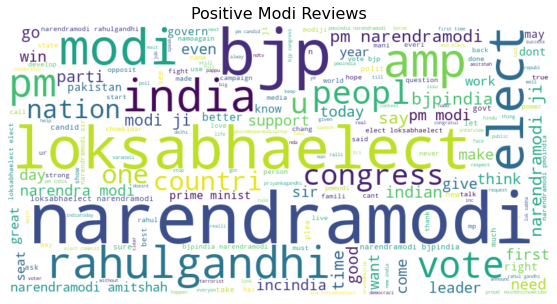

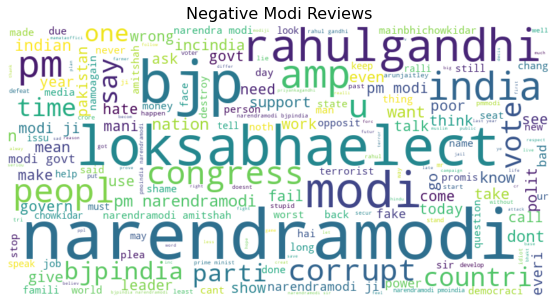

In [24]:
# Create a function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Separate positive and negative Modi reviews
positive_modi_reviews = df_modi_data[df_modi_data['Label'] == 'positive']['Tweet']
negative_modi_reviews = df_modi_data[df_modi_data['Label'] == 'negative']['Tweet']

# Join the reviews into single strings
positive_modi_text = ' '.join(positive_modi_reviews)
negative_modi_text = ' '.join(negative_modi_reviews)

# Generate and display word clouds for Modi
generate_word_cloud(positive_modi_text, 'Positive Modi Reviews')
generate_word_cloud(negative_modi_text, 'Negative Modi Reviews')

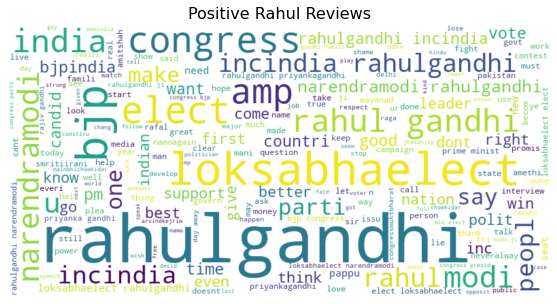

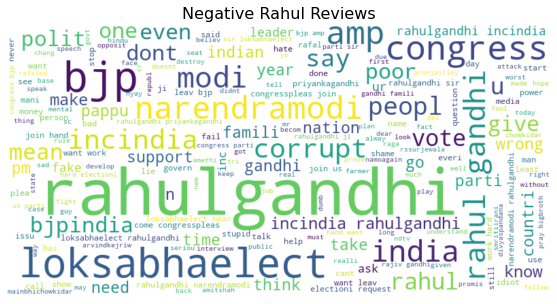

In [25]:
# Create a function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Separate positive and negative Modi reviews
positive_rahul_reviews = df_rahul_data[df_rahul_data['Label'] == 'positive']['Tweet']
negative_rahul_reviews = df_rahul_data[df_rahul_data['Label'] == 'negative']['Tweet']

# Join the reviews into single strings
positive_rahul_text = ' '.join(positive_rahul_reviews)
negative_rahul_text = ' '.join(negative_rahul_reviews)

# Generate and display word clouds for Modi
generate_word_cloud(positive_rahul_text, 'Positive Rahul Reviews')
generate_word_cloud(negative_rahul_text, 'Negative Rahul Reviews')